In [218]:
import os
from argparse import Namespace
import json

import pandas as pd
import matplotlib.pyplot as plt
from torch.nn import functional as fnn

from train import main

In [ ]:
#!g1.1
loss_fn_lst = [fnn.l1_loss, fnn.smooth_l1_loss]#, fnn.mse_loss]

for loss_fn in loss_fn_lst:
    request = Namespace(
        name=f'resnext50_{loss_fn.__name__}_CosineAnnealingWarmRestarts_16000_10',
        data_folder='data',
        data_size=16_000,
        crop_size=256,
        batch_size=32,
        epochs=10,
        learning_rate=0.001,
        gpu=True,
        worker=1
    )
    main(request, loss_fn)

Reading data...
Creating model...

Tune optimizer...
Ready for training with model=resnext50_32x4d, loss=l1_loss, scheduler=CosineAnnealingWarmRestarts ...
Epoch # 0:	train loss: 3.2e+01	val loss: 9.7e+01
Epoch # 1:	train loss:   6.8	val loss: 8.3e+01
Epoch # 2:	train loss:   6.2	val loss: 7.4e+01
Epoch # 3:	train loss:   5.4	val loss: 3.4e+01
Epoch # 4:	train loss:   4.3	val loss: 2.5e+01
Epoch # 5:	train loss:   4.0	val loss: 2.3e+01
Epoch # 6:	train loss:   3.8	val loss: 2.1e+01
Epoch # 7:	train loss:   3.7	val loss: 1.9e+01
Epoch # 8:	train loss:   3.5	val loss: 1.9e+01
Epoch # 9:	train loss:   3.4	val loss: 1.7e+01
Create submission...
Reading data...
Creating model...
Tune optimizer...
Ready for training with model=resnext50_32x4d, loss=smooth_l1_loss, scheduler=CosineAnnealingWarmRestarts ...
Epoch # 0:	train loss: 3.1e+01	val loss: 1.2e+02
Epoch # 1:	train loss:   6.8	val loss: 8.5e+01
Epoch # 2:	train loss:   6.1	val loss: 8.1e+01


load landmarks...: 100%|██████████| 16000/16000 [00:01<00:00, 10895.92it/s] 
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /tmp/xdg_cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
validation...: 100%|██████████| 100/100 [00:14<00:00,  6.88it/s]

Epoch # 3:	train loss:   5.7	val loss: 7.1e+01



train...:  31%|███       | 122/395 [00:24<00:55,  4.94it/s]

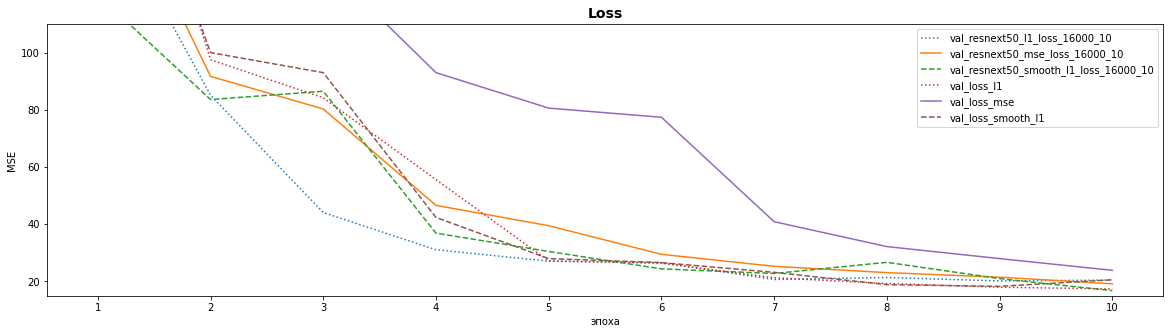

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:828: UserWarning: The following variables cannot be serialized: f
  warnings.warn(message)


In [212]:
# figure
plt.figure(figsize=(20, 5)) 
ax = plt.axes() # Add an axes to the current figure and make it the current axes

for experiment, ls in [
    ('resnext50_l1_loss_16000_10', 'dotted'),
    ('resnext50_mse_loss_16000_10', 'solid'),
    ('resnext50_smooth_l1_loss_16000_10', 'dashed'),
    ('loss_l1', 'dotted'),
    ('loss_mse', 'solid'),
    ('loss_smooth_l1', 'dashed')
]:
    
    with open(f'runs/{experiment}/metrics_{experiment}.txt') as f:
        metrics = json.load(f)

    # data
    x = range(1, len(metrics['val_loss']) + 1)
    #ls = 'solid' if (experiment=='resnext50_mse_loss_16000_10') or (experiment=='loss_mse') else 'dotted'
    ax.plot(x, metrics['val_loss'], linestyle=ls, label=f'val_{experiment}')

# annotation    
ax.set_title('Loss', fontsize=14, fontweight='bold')
ax.set_xlabel('эпоха')
ax.set_ylabel('MSE')
ax.legend()
ax.set_xticks(range(1, len(metrics['train_loss']) + 1))
_ = ax.set_ylim([15, 110])